<a href="https://colab.research.google.com/github/fabioalves97/fabioalves97/blob/main/Projeto_de_Redes_CNNs_usando_a_base_de_dados_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



--- **Implementação da arquitetura LeNet-5**

Nesse projeto fiz a implementação da arquitetura conhecida
como LeNet-5, baseada na aula da minha pós graduação referente a Deep Learning (Tema Redes Neurais Convolucionais conhecida também como CNNs). Segue abaixo todo o procedimento que fiz para chegar no melhor resultado do modelo.

1. **Carregamento dos dados**

Para esse projeto utlizamos a base de dados **MNIST** que está disponível na biblioteca **TensorFlow**. Importei o **Tensorflow** e carregamos os dados.

Segue o código abaixo:


In [1]:
import tensorflow as tf
(x_treino, y_treino), (x_teste, y_teste) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


1.1 Quando carregados os códigos perceba que temos dois pares ordenados:
*   Treinamento
*   Testes

Outro pronto que vale ressaltar é que as variáveis **"x_treino"** e **"x_teste"** se refere aos **dados das imagens** e **"y_treino"** e **"y_teste"** os **rótulos das variáveis.**





2. **Visualização dos dados**

Para a verificação se tudo ocorreu corretamente, utilizei a biblioteca **matplotlib.pyplot** e imprimi os dados da memória.

Segue o código abaixo:


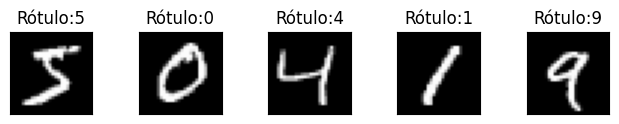

In [2]:
import matplotlib.pyplot as plt

for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.subplot(1, 5, i+1)
  plt.tight_layout()
  plt.imshow(x_treino[i].reshape(28, 28), cmap='gray')
  plt.title('Rótulo:{}'.format(y_treino[i]))
  plt.xticks([])
  plt.yticks([])
plt.show()

2.1 Logo após importar o **matplotlib.pyplot**, usei um laço para imprimir os cinco primeiros registros do conjunto de dados de treinamento como visto na imagem acima apos rodar o código.

3. **Separação dos conjuntos de dados**

Agora organizei os dados em três subconjustos.

Que são:
*   **Dados de treinamento**:
São usados para o modelo extrair as características dos dados e fazer generalizações.
*   **Dados de validação**:
São usados (ainda na fase de treinamento) para que o modelo possa se ajustar.
*  **Dados de testes**:
São utiizados para verificarmos a qualidade do modelo para fazer predições.

Segue o código abaixo:




In [3]:
import numpy as np

quantidade_dados_treino = 55000

x_validacao = x_treino[quantidade_dados_treino:, ..., np.newaxis]
y_validacao = y_treino[quantidade_dados_treino:]
x_treino = x_treino[:quantidade_dados_treino, ..., np.newaxis]
y_treino = y_treino[:quantidade_dados_treino]

x_teste =  x_teste[..., np.newaxis]

print('Formato da Imagem:{}'.format(x_treino[0].shape), end = '\n')
print('Conjunto de Treinamento:{} registros'.format(len(x_treino)))
print('Conjunto de Validação:{}registros'.format(len(x_validacao)))
print('Conjunto de Testes:      {} registros'.format(len(x_teste)))

Formato da Imagem:(28, 28, 1)
Conjunto de Treinamento:55000 registros
Conjunto de Validação:5000registros
Conjunto de Testes:      10000 registros


3.1 No início eu importei o pacote **numpy** para realizar a manipulação dos vetores. A MNIST possui o total de **70.000** registros, sendo que **60.000** são para **treinamento** e **10.000** para **testes**. Nesse projeto junto com a aula eu separei os dados em duas partes: **55.000** registros para treinar e **5.000** para validar o modelo. Como visto após rodar o código acima.

4. **Preenchimento (padding) dos dados de entrada**

Nesse passo fiz os ajustes nos dados de entrada, pois, a camada de entrada da arquitetura da **LeNet-5** consiste em imagens com as dimensões **32x32**. Como visto no código anterior o formato de imagem gerado da **MNIST** tem o formato de imagem **28x28**. Enfiz o preenchimento com **zeros**, para tornar a dimensão **32x32** e para isso foi utilizado a função **pad** da biblioteca **numpy**

Segue o código abaixo:

In [7]:
x_treino = np.pad(x_treino, ((0,0),(2,2),(2,2),(0,0)), 'constant')
x_validacao = np.pad(x_validacao, ((0,0),(2,2),(2,2),(0,0)), 'constant')
x_teste = np.pad(x_teste, ((0,0),(2,2),(2,2),(0,0)), 'constant')


print('Informações sobre as mudanças dos dados de entrada: ', end='\n\n')
print('Conjunto de treinamento: {}'.format(x_treino.shape))
print('Conjunto de Validação: {}'.format(x_validacao.shape))
print('Conjunto de Testes: {}'.format(x_teste.shape))

Informações sobre as mudanças dos dados de entrada: 

Conjunto de treinamento: (55000, 32, 32, 1)
Conjunto de Validação: (5000, 32, 32, 1)
Conjunto de Testes: (10000, 32, 32, 1)


5. **Normalização dos dados**

O **MNIST** tem dados de entrada com escalas de cinza, ou seja, vão de **0 a 255**. Nisso transformei os dados no intervalo de **0 a 1**. Para isso, dividi os valores das variáveis por **255**

Segue o código abaixo:

In [10]:
normalizar_dados = lambda t: t/255
x_treino = normalizar_dados(x_treino)
x_validacao = normalizar_dados(x_validacao)
x_teste = normalizar_dados(x_teste)

5.1 Utilizei a função **lambda** que recebe o parâmetro **t** de entrada e retorna os valores divididos por **255**

6. **Arquitetura LeNet**

Até esse momento só manipulei os dados de entrada, como carregar, visualizar, separar e fazer os ajustes. Nesse momento agora vamos implementar a arquitewtura da rede de convolução **LeNet-5**.

**Lembrando que a LeNet tem 8 camadas: 1 de entrada, 3 de convolução, 2 de aglomeração (pooling) e 2 totalmente conectadas, sendo uma delas a saída.**

Importei o pacote **Sequntial** do** tensorflow.keras**, porque, se trata de uma arquitetura de modelo sequencial. Em seguida importei os pacotes para cada camada do modelo.

Segue o código abaixo:

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

def arquitetura_LeNet_5(funcao_ativacao):
     modelo = Sequential()

     modelo.add(Conv2D(6, kernel_size=(5, 5),
                         strides=(1, 1),
                         activation=funcao_ativacao,
                         input_shape=(32,32,1),
                         padding='valid'))

     modelo.add(AveragePooling2D(pool_size=(2, 2),
                                 strides=(2, 2),
                                 padding='valid'))

     modelo.add(Conv2D(16, kernel_size=(5, 5),
                         strides=(1, 1),
                         activation=funcao_ativacao,
                         padding='valid'))

     modelo.add(AveragePooling2D(pool_size=(2, 2),
                                 strides=(2, 2),
                                 padding='valid'))

     modelo.add(Conv2D(120, kernel_size=(1, 1),
                         strides=(1, 1),
                         activation=funcao_ativacao,
                         padding='valid'))

     modelo.add(Flatten())

     modelo.add(Dense(84, activation=funcao_ativacao))

     modelo.add(Dense(10, activation='softmax'))

     return modelo

6.1 Implementei uma função "**def arquitetura_LeNet_5(funcao_ativacao)**"
Essa função recebe como parâmetro o nome da função de ativação que utilizei nas camadas. Cada trecho do código foi preenchido por **"modelo.add"** que é responsável pela implementação de uma camada.

Para ficar uma explicação mais clara:



*   Conv2D:
No caso das camadas de convolução.
*   AveragePooling2D:
No caso das camadas de aglomeração (pooling).
*   Dense:
No caso das camadas completamente conectadas.

No caso ainda precisava **"vetorizar"** a camada de convolução para conectar com a penúltima camada completamente conectada que é dada por **Flatten**

O calculo das dimensões é dado pela formula:
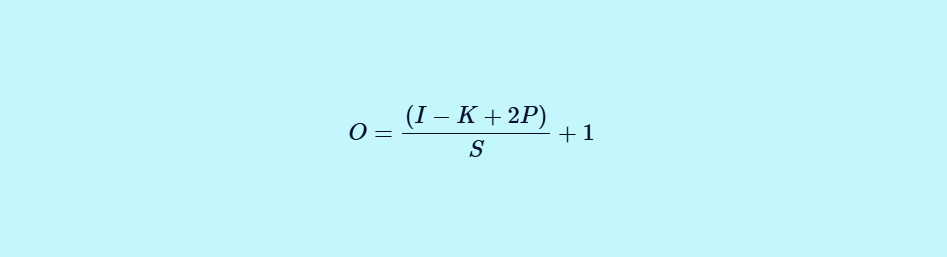


6.2 Assim temos:




1.   Camada 1:
Recebe uma imagem de dimensões 32 × 32, kernel com dimensões 5 × 5, padding igual a válido – que numericamente é igual a zero – e stride igual a 1. Portanto, temos:

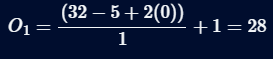

2. Camada 2
Recebe uma entrada de dimensões 28 × 28, kernel com dimensões 2 × 2, padding igual a válido e stride igual a 1. Logo:

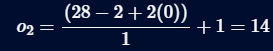
3. Camada 3
Recebe uma entrada de dimensões 14 × 14, kernel com dimensões 5 × 5, padding igual a válido e stride igual a 1. Então, temos:

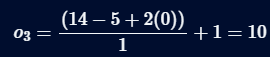
4. Camada 4
Recebe uma entrada de dimensões 10 × 10, kernel com dimensões 2 × 2, padding igual a válido e stride igual a 1. Assim:

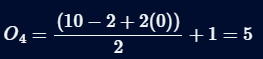




6.3 Da camada anterior temos 400 (= 5 × 5 × 16) nós com 120 filtros. Conectei os 400 nós da camada anterior a os 84 nós da próxima camada. Assim, tenho uma camada de saída com dez neurônios, pois, **MNIST** possui dez categorias.

Vale ressaltar que as categorias dos dados da base **MNIST** é referente aos dígitos 0, 1, 2, 3, 4, 5, 6, 7, 8 e 9.

7. Visualização da arquitetura do modelo

Agora montei a arqitetura da nossa implemntação.
Chamamos a função **arquitetura_LeNet_5** e no código solicitamos um **resumo do modelo**.

Passei o nome **relu** como parâmetro para a função montar a arquitetura do modelo.

Segue o código abaixo:

In [12]:
modelo = arquitetura_LeNet_5('relu')
modelo.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 5, 5, 120)      │         2,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 84)             │       252,084 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257,546 (1006.04 KB)

 Trainable params: 257,546 (1006.04 KB)

 Non-trainable params: 0 (0.00 B)

8. Treinamento do modelo e Avaliação do modelo

Vale ressaltar que nessa parte do treinamento do modelo após a estruturação do mesmo, tive que mudar algumas coisas do código, pois, na minha aula o começo do código estava assim:

**from tensorflow.keras.losses import CategoricalCrossentropy**

 **modelo.compile(loss='sparse_categorical_crossentropy', **
                 **optimizer='sgd', metrics=['accuracy'])**

 **quantidade_de_epocas = 10**
 **historico_treinamento = modelo.fit(x_treino, y_treino,**
                                     **validation_data=(x_validacao,** **y_validacao)**,
                                     **batch_size=64,**
                                     **epochs=quantidade_de_epocas)**

Porém na hora de avaliar o modelo minha accuracy estava dizendo que o meu modelo não estava aprendendo e tinha um loss muito maior que a accuracy como visto abaixo:

**loss:2.300063133239746**

**accuracy:0.11349999904632568**

Então acabei fazendo algumas mudanças. A primeira mudança foi utilizar o otimizador **Adam** ao invés do **SGD**, que converge melhor em muitos casos iniciais. Logo depois mudei a **quantidade_de_epocas** para **20**, pois, o modelo conseguia aprender de uma forma mais calma e não rápida como estava antes com **10**.

Com essa mudanças deu para perceber que o aprendizado a partir do **Epoch 2/20**, começou ter uma accuracy maior do que o loss.

Segue o código abaixo:



In [18]:
from tensorflow.keras.optimizers import Adam
modelo.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

quantidade_de_epocas = 20
historico_treinamento = modelo.fit(x_treino, y_treino, validation_data=(x_validacao, y_validacao),batch_size=64, epochs=quantidade_de_epocas)
 # Salva o modelo
modelo.save('modelo_lenet5.keras')

Epoch 1/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 34s 37ms/step - accuracy: 0.5476 - loss: 1.2894 - val_accuracy: 0.9194 - val_loss: 0.2813
Epoch 2/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 34s 39ms/step - accuracy: 0.9015 - loss: 0.3237 - val_accuracy: 0.9444 - val_loss: 0.1861
Epoch 3/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 40s 38ms/step - accuracy: 0.9291 - loss: 0.2315 - val_accuracy: 0.9540 - val_loss: 0.1549
Epoch 4/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 44s 41ms/step - accuracy: 0.9438 - loss: 0.1832 - val_accuracy: 0.9636 - val_loss: 0.1315
Epoch 5/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - accuracy: 0.9531 - loss: 0.1525 - val_accuracy: 0.9642 - val_loss: 0.1231
Epoch 6/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.9603 - loss: 0.1268 - val_accuracy: 0.9706 - val_loss: 0.1101
Epoch 7/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 40s 37ms/step - accuracy: 0.9668 - loss: 0.1085 - val_accuracy: 0.9766 - val_loss: 0.0888
Epoch 8/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.9711 - loss: 0.0912 - 

8.1 Vale destacar algumas coisas:


*  Os parâmetros de compilação: da função de perda, otimizador e a métrica para validação do modelo.
*  No treinamento do modelo, guardei o histórico para analisá-lo posteriormente.
*  E salvei o modelo para carrega-lo em outro momento.

Sempre é importante armazenar os dadosa de treinamento.



8.2 Segue agora a Avaliação do modelo após as mudanças que fiz citado acima.

Segue o código abaixo:

In [19]:
loss, accuracy = modelo.evaluate(x_teste, y_teste,batch_size=64);
print('loss:{}'.format(loss))
print('accuracy:{}'.format(accuracy))

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9773 - loss: 0.0713
loss:0.062618687748909
accuracy:0.9807999730110168


8.3 Dos resultados que tive antes:

**loss:2.300063133239746**

**accuracy:0.11349999904632568**

Agora obtive:

**loss:0.062618687748909**

**accuracy:0.9807999730110168**

 isso significa que o meu modelo está acertando **quase 98%** dos dígitos do **MNIST**, o que é excelente!

 Isso aconteceu por conta:

*  Trocar o otimizador para Adam: Ele ajusta a taxa de aprendizado dinamicamente, o que ajuda bastante em tarefas de classificação como o MNIST.
*  Mais épocas: Mais tempo para o modelo aprender os padrões dos dados.



9. Predição de dados

Após o modelo treinado e feita a avaliação da qualidade dele como mostrado acima, agora vamos para a parte de predição de dados. Aqui utilizei um dos dados que foi separado o teste e verificar como o modelo se comportaria.

Segue o código abaixo:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Predição: [5.8082661e-10 9.5780215e-06 6.1667861e-06 9.9944729e-01 2.6850463e-11
 1.9397288e-04 1.0805722e-10 8.7469533e-07 2.8165482e-06 3.3937351e-04]

Nosso modelo CNN prevê que o dígito na imagem é: 3


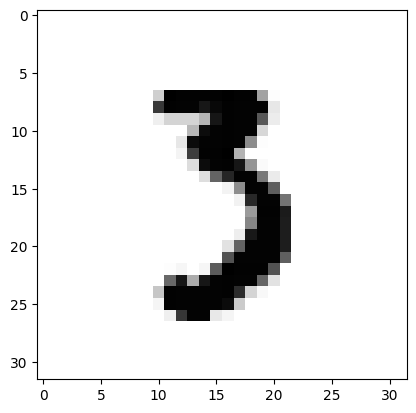

In [21]:
indice_imagem = 1976

predicao = modelo.predict(x_teste[indice_imagem].reshape(1,32,32,1))

print('Predição: {}'.format(predicao[0]), end = '\n\n')

print('Nosso modelo CNN prevê que o dígito na imagem é:', predicao.argmax())
plt.imshow(x_teste[indice_imagem].reshape(32,32), cmap='Greys')

9.1 No vetor **4: 9.9944729e-01**, mostra que o modelo tem uma **maior** confiança nessa categoria para fazer a predição de entrada.

10. Recuperação do modelo

Aqui só para mostrar como recuperar o modelo anteriormente. Utlizamos o nome que salvamos que no caso foi **modelo_lenet5.keras**

Segue o código abaixo:

In [34]:
modelo_recuperado = tf.keras.models.load_model('modelo_lenet5.keras')

11. Impressão do treinamento
Agora que já terminei o treinamento do modelo, veremos agora como ele se comportou enquanto estava treinando. Para isso, vou utilizar a varável **historico_treinamento** que utilizei para guardar as informações do histórico do modelo enquanto estava em treinamento.

Segue o código abaixo:

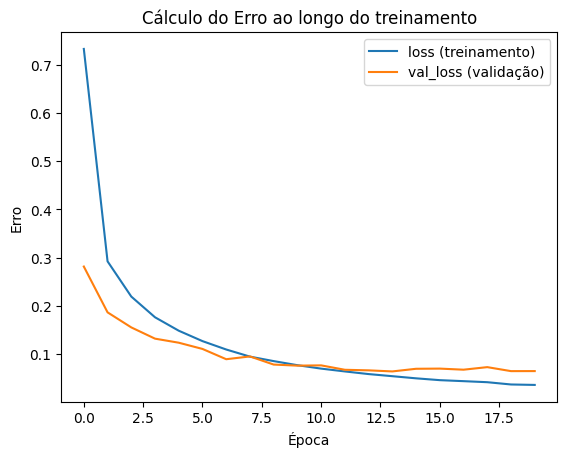

In [24]:
plt.title('Cálculo do Erro ao longo do treinamento')
plt.ylabel('Erro')
plt.xlabel('Época')

plt.plot(historico_treinamento.history['loss'])
plt.plot(historico_treinamento.history['val_loss'])
plt.legend(['loss (treinamento)', 'val_loss (validação)'], loc='upper right')
plt.show()


11.1 Vale detalhar abaixo:

*  **val_loss:**
É o valor da função de custo para os dados de validação cruzada.
*   **Perda (loss):**
É o valor da função de custo para os dados de treinamento.



12. Previsões

Aqui fiz uma das previsões para o modelo.

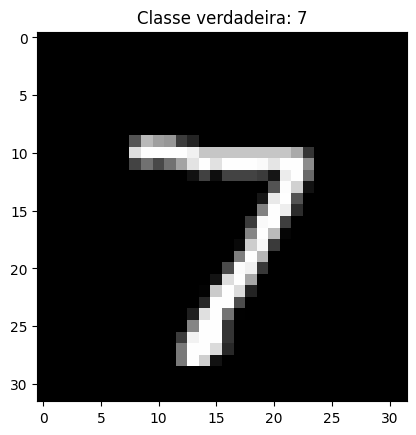

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Classe prevista: 7


In [35]:
import numpy as np
import matplotlib.pyplot as plt

amostra = x_teste[0]
plt.imshow(amostra.reshape(32, 32), cmap='gray')
plt.title(f"Classe verdadeira: {y_teste[0]}")
plt.show()

previsao = modelo.predict(amostra.reshape(1, 32, 32, 1))
print(f"Classe prevista: {np.argmax(previsao)}")

13. Salvando o modelo novamente

In [27]:
modelo.save('modelo_mnist_final.keras')
